In [5]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [7]:
ruta = ('/Users/juanc/OneDrive/Escritorio/grupo1_analisis/data/calidad_clean_outliers.csv')
df = pd.read_csv(ruta, delimiter=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


In [15]:
import matplotlib.pyplot as plt

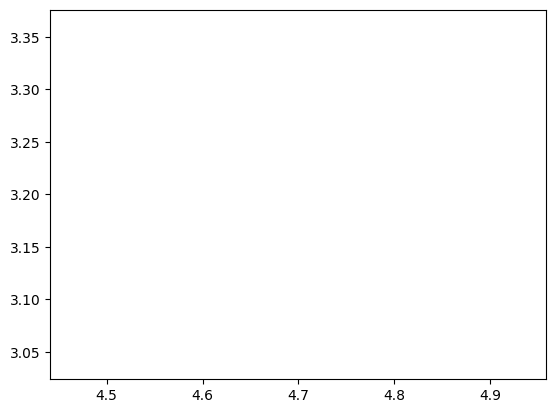

In [17]:
# define data
x = (4.7)
y = (3.2)

# crear una línea plot
plt.plot(x, y)

# mostrar la línea plot
plt.show()

In [ ]:
# Relación entre datos, utilizando, por ejemplo, los valores Max y Min de Temperatura

dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

# intentando solucionar el error 'str' no tiene atributo 'plot'